In this file, we'll:

* explore why image classification is a hard task
* observe the limitations of traditional machine learning models for image classification
* train, test, and improve a few different deep neural networks for image classification

As we mentioned in the first file, deep neural networks have been used to reach state-of-the-art performance on **image classification** tasks in the last decade. For some image classification tasks, deep neural networks actually perform as well as or slightly better than the human benchmark. We can read about the history of deep neural networks [here](https://arxiv.org/ftp/arxiv/papers/1803/1803.01164.pdf).

In this file, we'll build models that can classify handwritten digits. Before the **year 2000**, institutions like the **United States Post Office** used handwriting recognition software to read **addresses**, **zip codes**, and more. One of their approaches, which consists of pre-processing handwritten images then feeding to a neural network model is detailed in this [paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.852.5499&rep=rep1&type=pdf).

### Why is image classifcation a hard task?

Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

1. Each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a `128 x 128` image has `16384` features.

2. Images are often downsampled to lower resolutions and transformed to grayscale (no color). This is a limitation of compute power unfortunately. The resolution of a `8 megapixel` photo has `3264` by `2448` pixels, for a total of `7,990,272` features (or about `8 million`). Images of this resolution are usually scaled down to between `128` and `512` pixels in either direction for significantly faster processing. This often results in a loss of detail that's available for training and pattern matching.

3. The features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like **linear or logistic regression**. In grayscale, each pixel is just represented as a brightness value ranging from `0` to `256`.

Here's an example of how an image is represented across the different abstractions we care about:

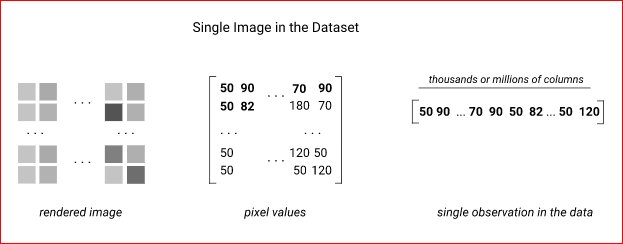

#### Why is deep learning effective in image classification?

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process. Here's a diagram that visualizes what the weights represent at each layer of a **convolutional neural network (CNN)**, a type of network that's often used in image classification, which was trained to identify faces.

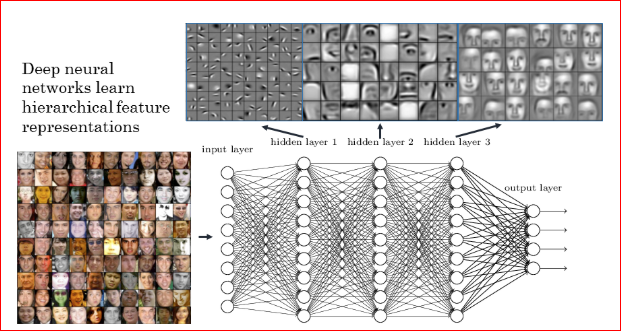

* We'll notice in the first hidden layer the network learned to represent **edges and specific features of faces**. 
* In the second hidden layer, the weights seemed to represent higher level facial features like **eyes** and **noses**. 
* Finally, the weights in the last hidden layer resemble faces that could be matched against. Each successive layer uses weights from previous layers to try to learn more complex representations.

In this file, we'll explore the effectiveness of deep, feedforward neural networks at classifying images.

Scikit-learn contains a number of [datasets](https://scikit-learn.org/stable/datasets/index.html) pre-loaded with the library, within the namespace of sklearn.datasets. The [load_digits() function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) returns a copy of the [hand-written digits dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) from **UCI**.

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions `(28 x 28 pixels)`. To visualize the image, we need to reshape these pixel values back into the `28` by `28` and plot them on a coordinate grid.

To reshape the image, we need to convert a training example to a numpy array (excluding the label column) and pass the result into that into the `numpy.reshape()` function. we can visualize it using [pyplot.imshow()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html?highlight=matplotlib%20pyplot%20imshow#matplotlib.pyplot.imshow) function:

In [70]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
digits_data = load_digits()
type(digits_data)

sklearn.utils.Bunch

In [72]:
digits_data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [73]:
labels = pd.Series(digits_data["target"])
data = pd.DataFrame(digits_data["data"])

In [74]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [75]:
first_image = data.iloc[0]
img_values = first_image.values
print(len(img_values))
img_values

64


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

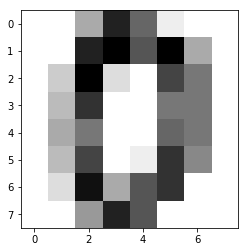

In [76]:
np_image = img_values.reshape(8,8)
plt.imshow(np_image, cmap = "gray_r")

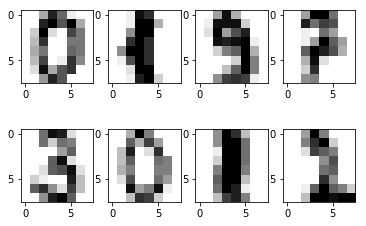

In [77]:
# scatter plot grid, with 2 rows and 4 columns.

# In the first row: images corresponding to rows 0, 100, 200, and 300.
# In the second row images corresponding to rows 1000, 1100, 1200, and 1300.

fig,ax = plt.subplots(2,4)

ax[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
ax[0,2].imshow(data.iloc[199].values.reshape(8,8),cmap = "gray_r")
ax[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

ax[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
ax[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
ax[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
ax[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

plt.show()

* While **linear and logistic regression** models make assumptions about the linearity between the features and the output labels, 
* The **k-nearest neighbors** algorithm make no such assumption. This allows them to capture nonlinearity in the data. If we recall, k-nearest neighbors don't have a specific model representation (hence why it's referred to as an algorithm and not a model). The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the **nearest**) observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

# K-Nearest Neighbors Model

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [79]:
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy


In [80]:
#  function named that performs 4-fold cross validation using train() and test().

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [81]:
knn_one_accuracies = cross_validate(1)

print(np.mean(knn_one_accuracies))
print()
print(knn_one_accuracies)

0.9677233358079684

[0.9688888888888889, 0.9599109131403119, 0.9799554565701559, 0.9621380846325167]


In [82]:
# Experiment with different values for k
k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
k_overall_accuracies

[0.9677233358079684,
 0.9616010888393962,
 0.9627183865379857,
 0.9649480326651819,
 0.9621665429349171,
 0.9588270230141054,
 0.9571591190299431,
 0.9571578817124474,
 0.9543801039346697]

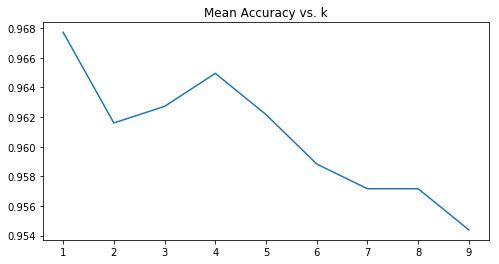

In [83]:
plt.figure(figsize=(8,4))
plt.plot(k_values, k_overall_accuracies)
plt.title("Mean Accuracy vs. k")
plt.show()

There are a few downsides to using k-nearest neighbors:

* high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
* no model representation to debug and explore

# Neural Network With One Hidden Layer

In [93]:
from sklearn.neural_network import MLPClassifier

def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [94]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]


nn_one_accuracies = []
for nn in nn_one_neurons:
    nn_accuracies = cross_validate(nn)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

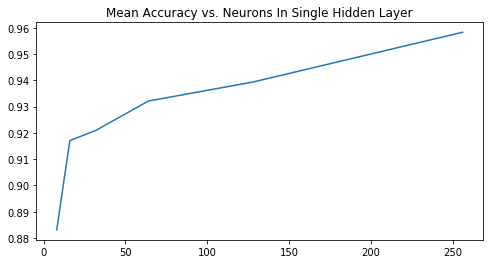

In [95]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")
x = [i[0] for i in nn_one_neurons]

plt.plot(x, nn_one_accuracies)
plt.show()

# Summary:

It looks like adding more neurons to the single hidden layer helped massively improved simple accuracy from approximately `86%` to approximately `94%`. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about **false or true positives** or **false or true negatives**.

Given that k-nearest neighbors achieved approximately `96%` accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

# Neural Network With Two Hidden Layers

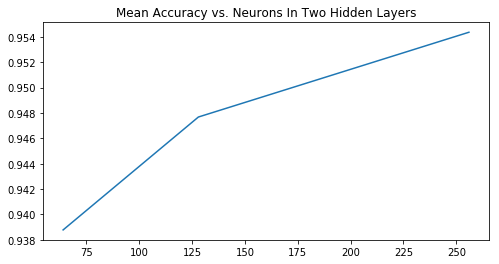

In [96]:
nn_two_neurons = [
    (64,64),
    (128, 128),
    (256, 256)
]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

In [97]:
nn_two_accuracies

[0.9387812422667657, 0.9476812670131155, 0.954364018807226]

# Summary
Using 2 hidden layers improved our simple accuracy to `95%`. While we'd traditionally be worried about overfitting, using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra `1%` in simple accuracy over the single hidden layer networks we tried earlier.

Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for **k-fold cross validation** to `6` while testing networks with `3` **hidden layers**.

In [98]:
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate_six(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

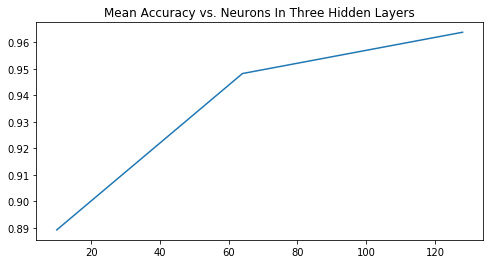

In [99]:
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate_six(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)

In [100]:
nn_three_accuracies

[0.8892716462281681, 0.9482478632478633, 0.9638275733927908]

# Summary
Using 3 hidden layers improved our simple accuracy to `96%`, even with **6-fold cross validation**. This seems to be in line with the research literature out there about **deep neural networks for computer vision**. Having more layers and more neurons tends to improve the network's performance.